<a href="https://colab.research.google.com/github/geramirezl/MetNumUN2020II/blob/master/geramirezlScottSanderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
lis = ["hello",2,4,3.4,9]
lis

['hello', 2, 4, 3.4, 9]

In [7]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [8]:
first = lis[0]
second = lis[1]
print("first:", first)
print("second:", second)

first: hello
second: 2


In [9]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [10]:

last = lis[-1]
penultimate = lis[-2]
print("last:", last)
print("second to last:", penultimate)

last: 9
second to last: 3.4


In [11]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [12]:

sublist2 = lis[2:4]
sublist2

[4, 3.4]

In [13]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [14]:

first_three2 = lis[:3]
first_three2

['hello', 2, 4]

In [15]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [16]:

after_three2 = lis[3:]
after_three2

[3.4, 9]

In [17]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [18]:
lis = [1,2,3,4,5,6,7,8,9,10]
lis[1:9:3]

[2, 5, 8]

In [19]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [20]:

lis[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [21]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [22]:

lis= ["un","dos","tres"]
print("Before:", lis)
lis.append('cuatro')
print("After:", lis)

Before: ['un', 'dos', 'tres']
After: ['un', 'dos', 'tres', 'cuatro']


In [23]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [24]:
lis = [10,2,3,4,1,20,30]
[x /2 for x in lis]

[5.0, 1.0, 1.5, 2.0, 0.5, 10.0, 15.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [25]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [26]:
dicty = {"voc":"a","let":"b","num":1}
dicty

{'let': 'b', 'num': 1, 'voc': 'a'}

In [27]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [28]:
dicty['sign'] = '-'
dicty

{'let': 'b', 'num': 1, 'sign': '-', 'voc': 'a'}

In [29]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [30]:
del dicty['num']
dicty

{'let': 'b', 'sign': '-', 'voc': 'a'}

In [32]:
# No slicing.
print("philosophers['Bertrand':'Immanuel'] > unhashable type: 'slice'")

philosophers['Bertrand':'Immanuel'] > unhashable type: 'slice'


In [33]:
print("dicty['voc':'sign'] > unhashable type: 'slice'")

dicty['voc':'sign'] > unhashable type: 'slice'


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [34]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [35]:
a2 = [[1, 2, 2],
     [2, 3, 2],
     [5, 2, 3]]

b2 = [[1, 2, 3],
     [1, 2, 4]]

In [36]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [37]:
%%time

matmul(a, b)

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 37.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [38]:
%%time

matmul(a2, b2)

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 28.4 µs


[[3, 6, 11], [5, 10, 18], [7, 14, 23]]

In [39]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.3139404635681894, 0.9569364255502011, 0.6817743513309918],
 [0.23176997020624923, 0.1564312624440698, 0.09055258841644154]]

In [40]:
randm2 = random_matrix(3, 3)
randm2

[[0.05733514958745156, 0.14658062062908572, 0.2545704574861808],
 [0.11382458927776962, 0.7016286190175725, 0.7546301058975761],
 [0.6457147922185961, 0.8310618198267085, 0.1000829829076646]]

In [41]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.6 s, sys: 66.7 ms, total: 10.7 s
Wall time: 10.7 s


In [42]:
%%time
randa2 = random_matrix(400,500)
randb2 = random_matrix(500,400)
x2 = matmul(randa2, randb2)

CPU times: user 26.5 s, sys: 93.7 ms, total: 26.6 s
Wall time: 26.7 s


In [43]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [44]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [45]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [46]:
list_data2 = [float(i) for i in range(500000)]
array_data2 = np.array(list_data2)

In [47]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.43 ms, sys: 1.01 ms, total: 10.4 ms
Wall time: 12.3 ms


333328333350000.0

In [48]:
%%time
python_dot_product(list_data2, list_data2)

CPU times: user 44.4 ms, sys: 0 ns, total: 44.4 ms
Wall time: 45.5 ms


4.16665416666264e+16

In [49]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 189 µs, sys: 4 µs, total: 193 µs
Wall time: 198 µs


333328333350000.0

In [50]:
%%time
fortran_dot_product(array_data2, array_data2)

CPU times: user 1.08 ms, sys: 2 µs, total: 1.09 ms
Wall time: 1.12 ms


4.16665416666264e+16

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [51]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [52]:
[type(x) for x in _]

[int, complex, float, str]

In [53]:
mul_elemwise([3, 2, 3, 4], ["tres",73,2+10.1,3.4])


['trestrestres', 146, 36.3, 13.6]

In [54]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [55]:
source_code2 = 'a**b'
bytecode2 = compile(source_code2, '', 'eval')
dis.dis(bytecode2)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 BINARY_POWER
              6 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [56]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [57]:
data2 = np.array([3,4,5,6,7,8])
data2

array([3, 4, 5, 6, 7, 8])

In [58]:
data + data

array([2, 4, 6, 8])

In [59]:
data2 + data2

array([ 6,  8, 10, 12, 14, 16])

In [60]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 2.99 ms, total: 2.99 ms
Wall time: 1.73 ms


333328333350000.0

In [61]:
%%time

(array_data2 * array_data2).sum()

CPU times: user 3.78 ms, sys: 2.02 ms, total: 5.81 ms
Wall time: 9.7 ms


4.166654166675e+16

In [62]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 599 µs, sys: 1.99 ms, total: 2.59 ms
Wall time: 8.69 ms


333328333350000.0

In [63]:
%%time

array_data2.dot(array_data2)

CPU times: user 1.92 ms, sys: 988 µs, total: 2.9 ms
Wall time: 1.76 ms


4.166654166675e+16

In [64]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 205 µs, sys: 6 µs, total: 211 µs
Wall time: 218 µs


333328333350000.0

In [65]:
%%time
fortran_dot_product(array_data2, array_data2)

CPU times: user 994 µs, sys: 0 ns, total: 994 µs
Wall time: 1.03 ms


4.16665416666264e+16

In [66]:
# Numpy won't allow us to write a string into an int array.
print("data[0] ='foo' > ValueError: invalid literal for int() with base 10: 'foo'" )

data[0] ='foo' > ValueError: invalid literal for int() with base 10: 'foo'


In [67]:
print('data[3] = "notString" > ValueError: invalid literal for int() with base 10: "notString"')

data[3] = "notString" > ValueError: invalid literal for int() with base 10: "notString"


In [68]:
# We also can't grow an array once it's created.
print(" data.append(3) > AttributeError: 'numpy.ndarray' object has no attribute 'append'")

 data.append(3) > AttributeError: 'numpy.ndarray' object has no attribute 'append'


In [69]:
print(" data2.append(34) > AttributeError: 'numpy.ndarray' object has no attribute 'append'")

 data2.append(34) > AttributeError: 'numpy.ndarray' object has no attribute 'append'


In [70]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [71]:
d2resh = data2.reshape(3, 2)
d2resh

array([[3, 4],
       [5, 6],
       [7, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [72]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [73]:
arr2 = np.array([10,20,30,40,50,55,1,2,3], dtype='int16').reshape(3, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[10 20 30]
 [40 50 55]
 [ 1  2  3]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\n\x00\x14\x00\x1e\x00(\x002\x007\x00\x01\x00\x02\x00\x03\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [74]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [75]:
data2 = np.arange(9).reshape(3, 3)
data2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [76]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [77]:
data2 * data2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [78]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [79]:
# Unary functions.
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712]])

In [80]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [81]:
# Comparison operations
data2 !=3

array([[ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True]])

In [82]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [83]:
((data2 % 2) == 0) | ((data2 % 3) == 0)

array([[ True, False,  True],
       [ True,  True, False],
       [ True, False,  True]])

In [84]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [85]:
data2 @ data2.T

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [86]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [87]:
tang =  np.tan(np.linspace(0, 3.14, 5))
cosines2 = np.cos(np.linspace(0, 3.14, 5))
tang

array([ 0.00000000e+00,  9.99203990e-01,  1.25576559e+03, -1.00239184e+00,
       -1.59265494e-03])

In [88]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [89]:
cosines[0]

1.0

In [90]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [91]:
cosines[:4]  

array([1.        , 0.93975313, 0.76627189, 0.50045969])

In [92]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [93]:
cosines2[3:]  

array([-0.70626164, -0.99999873])

In [94]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [95]:
cosines[::2]  

array([ 1.        ,  0.76627189,  0.17434523, -0.4990802 , -0.93920748])

In [96]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [97]:
print("cosines:\n", cosines)
print("cosines > 0.3:\n", cosines > 0.3)
print("cosines[sines > 0.3]:\n", cosines[cosines > 0.3])

cosines:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
cosines > 0.3:
 [ True  True  True  True False False False False False False]
cosines[sines > 0.3]:
 [1.         0.93975313 0.76627189 0.50045969]


In [98]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [99]:
# We index with lists/arrays of integers to select values at those indices.
print(cosines)
cosines[[0,2,3,5,7,8]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        ,  0.76627189,  0.50045969, -0.17277674, -0.76524761,
       -0.93920748])

In [100]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [101]:
desord2 = np.array([5,31,45,6,-12,2-3])

In [102]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [103]:
sort = np.argsort(desord2)
sort

array([4, 5, 0, 3, 1, 2])

In [104]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [105]:
desord2[sort]

array([-12,  -1,   5,   6,  31,  45])

In [106]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [107]:
nums = np.array([15,23,46,2,1,-2,-98])  
assets2 = np.array(['A', 'B', 'C', 'D', 'E','F','G'])

In [108]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [109]:
sort_by_num = np.argsort(nums)
assets2[sort_by_num]

array(['G', 'F', 'E', 'D', 'A', 'B', 'C'], dtype='<U1')

In [110]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [111]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [112]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [113]:
data2 = np.arange(16).reshape(4,4)
data2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [114]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [115]:
data2[:3, :3]  

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [116]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [117]:
data2[:3, [0, -2]] 

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [118]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [119]:
data2[(data2[:, 3] % 3) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [120]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [121]:
variance(np.random.standard_normal(1000))

1.0464335022645155

In [122]:
variance(np.random.standard_normal(500))

0.9371260612964427

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [123]:
data = np.arange(30)
data.mean()

14.5

In [124]:
data2 = np.arange(100)
data2.mean()

49.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [125]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [126]:
data2 = np.arange(100).reshape(5, 20)
data2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [127]:
data.mean()

14.5

In [128]:
data2.mean()

49.5

In [129]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [130]:
data2.mean(axis=0)

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59.])

In [131]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [132]:
data2.mean(axis=1)

array([ 9.5, 29.5, 49.5, 69.5, 89.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [133]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [134]:
row2 = np.array([5,3,2,1,5,6])
column2 = np.array([[1], [2], [3], [1], [2], [3], [1]])
print("Row:\n", row2, sep='')
print("Column:\n", column2, sep='')

Row:
[5 3 2 1 5 6]
Column:
[[1]
 [2]
 [3]
 [1]
 [2]
 [3]
 [1]]


In [135]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [136]:
row2 + column2

array([[6, 4, 3, 2, 6, 7],
       [7, 5, 4, 3, 7, 8],
       [8, 6, 5, 4, 8, 9],
       [6, 4, 3, 2, 6, 7],
       [7, 5, 4, 3, 7, 8],
       [8, 6, 5, 4, 8, 9],
       [6, 4, 3, 2, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [137]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [138]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data2, sep='')
print("Mean:\n", data2.mean(axis=0), sep='')
print("Data - Mean:\n", data2 - data2.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
Mean:
[40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59.]
Data - Mean:
[[-40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40.
  -40. -40. -40. -40. -40. -40.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
   20.  20.  20.  20.  20.  20.]
 [ 40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.
   40.  40.  40.  40.  40.  40.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [139]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [140]:
s2 = pd.Series(index=['1', '2', '3', '4'], data=[1, 2, 4, 8])
s2

1    1
2    2
3    4
4    8
dtype: int64

In [141]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [142]:
print("The index is:", s2.index)
print("The values are:", s2.values)

The index is: Index(['1', '2', '3', '4'], dtype='object')
The values are: [1 2 4 8]


In [143]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [144]:
s2.iloc[0]

1

In [145]:
s.loc['a']

1

In [146]:
s2.loc['4']

8

In [147]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [148]:

s2.iloc[:4]

1    1
2    2
3    4
4    8
dtype: int64

In [149]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [150]:

s2.loc[:'3']

1    1
2    2
3    4
dtype: int64

In [151]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [152]:

s2.iloc[[0, -1,-2]]

1    1
4    8
3    4
dtype: int64

In [153]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [154]:

s2.loc[s2 == 2]

2    2
dtype: int64

In [155]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [156]:

other_s2 = pd.Series({'1': 10.1, '3': 20.0, '9': 30.4, '12': 40.0})
other_s2

1     10.1
3     20.0
9     30.4
12    40.0
dtype: float64

In [157]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [158]:
s2 + other_s2

1     11.1
12     NaN
2      NaN
3     24.0
4      NaN
9      NaN
dtype: float64

In [159]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [160]:
(s2 + other_s2).fillna(0.0)

1     11.1
12     0.0
2      0.0
3     24.0
4      0.0
9      0.0
dtype: float64

In [163]:
import pandas_datareader as pdr
import datetime

In [164]:
# Most real datasets are read in from an external file format.
aapl = pdr.get_data_yahoo('AAPL',start=datetime.datetime(2010,1,4),end=datetime.datetime(2012,2,1))
aapl.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200,6.478067


In [165]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,High,Low
Date,,
2010-01-04,7.660714,7.585000
2010-01-05,7.699643,7.616071


In [166]:
aapl.iloc[:5, ]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800,6.521136


In [167]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,6.954643,749876400
2010-02-02,6.995000,698342400
2010-02-03,7.115357,615328000
2010-02-04,6.858929,757652000


In [168]:
aapl.loc[pd.Timestamp('2011-01-01'):pd.Timestamp('2011-01-10'), ['Open']]

,Open
Date,
2011-01-03,11.630000
2011-01-04,11.872857
2011-01-05,11.769643
2011-01-06,11.954286
2011-01-07,11.928214
2011-01-10,12.101071


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

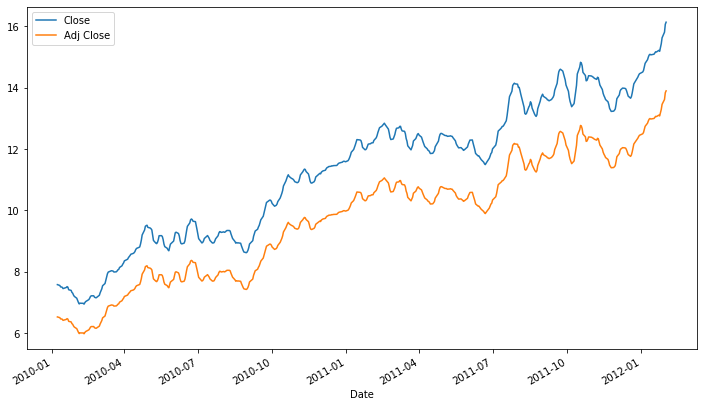

In [169]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

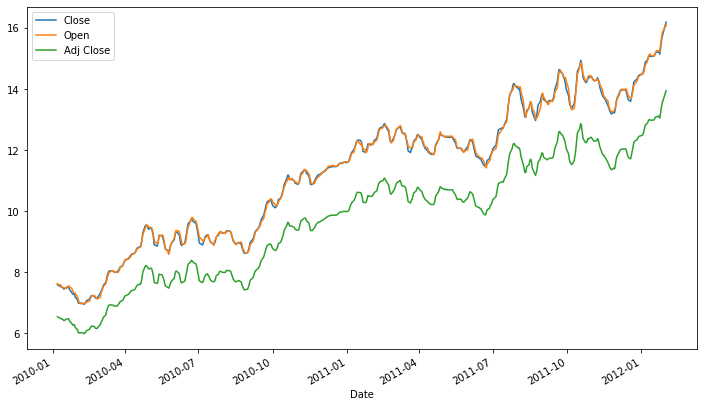

In [170]:
aapl.rolling(4)[['Close','Open','Adj Close']].mean().plot();

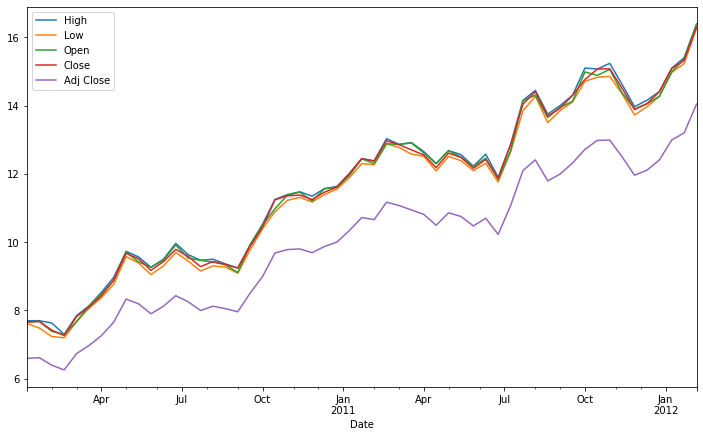

In [171]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

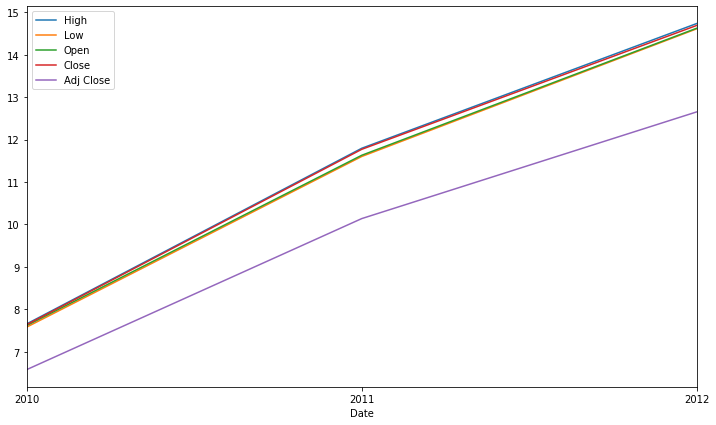

In [172]:
aapl.drop("Volume", axis=1).resample('1A').first().plot();

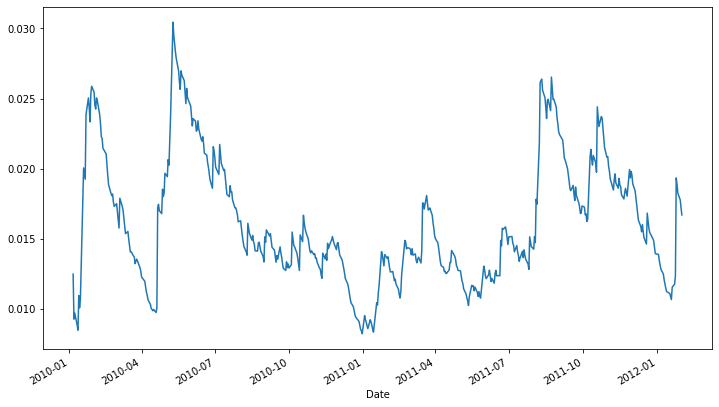

In [173]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

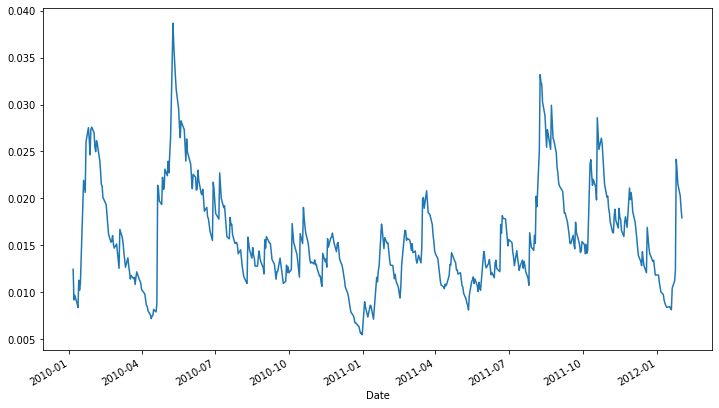

In [174]:
aapl['Adj Close'].pct_change().ewm(span=15).std().plot();

# "Real World" Data

In [176]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [177]:


avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [178]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

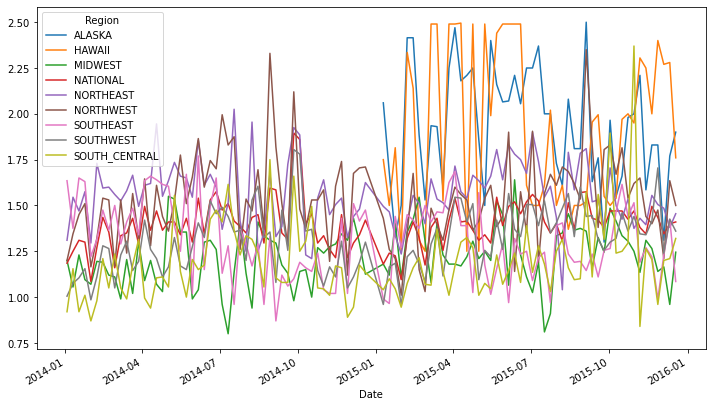

In [179]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

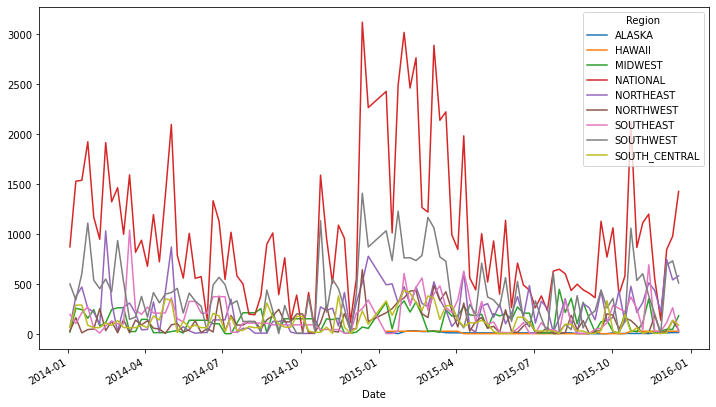

In [180]:
org = avocados[avocados.Organic == True]
org.groupby(['Date', 'Region'])['Number of Stores'].mean().unstack().ffill().plot();

In [181]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

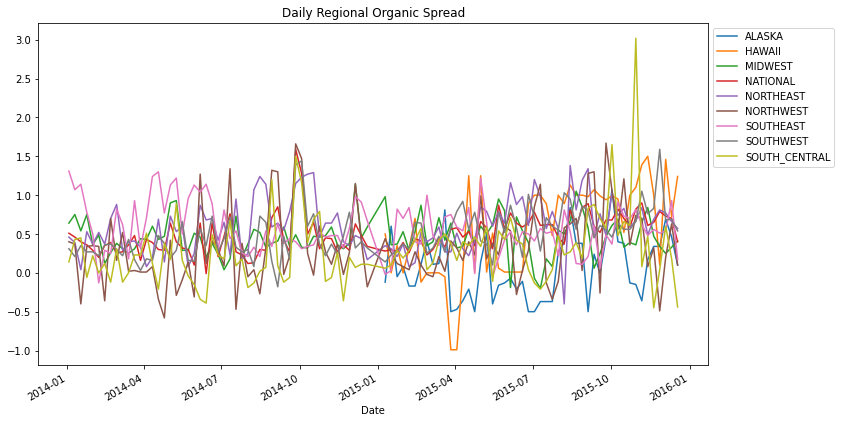

In [182]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [183]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


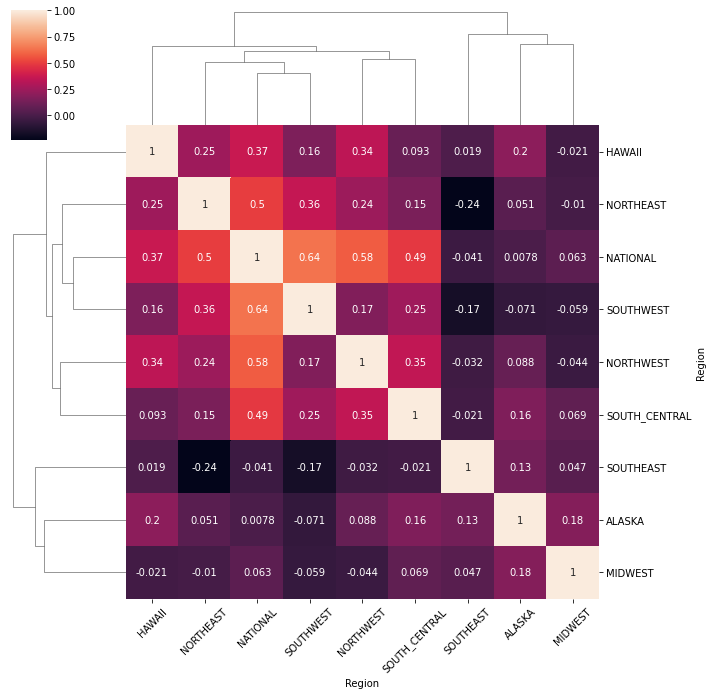

In [184]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Ejemplo con datos abiertos del gobierno (https://www.datos.gov.co):

Con una api para leer archivos csv
Descargamos un archivo de Casos positivos de COVID-19 en Colombia y lo subimos a los archivos del notebook.

In [226]:
covid = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [227]:
covid.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [228]:
covid.dtypes

fecha reporte web                object
ID de caso                        int64
Fecha de notificación            object
Código DIVIPOLA departamento      int64
Nombre departamento              object
Código DIVIPOLA municipio         int64
Nombre municipio                 object
Edad                              int64
Unidad de medida de edad          int64
Sexo                             object
Tipo de contagio                 object
Ubicación del caso               object
Estado                           object
Código ISO del país             float64
Nombre del país                  object
Recuperado                       object
Fecha de inicio de síntomas      object
Fecha de muerte                  object
Fecha de diagnóstico             object
Fecha de recuperación            object
Tipo de recuperación             object
Pertenencia étnica              float64
Nombre del grupo étnico          object
dtype: object

Creamos una gráfica con los datos de los primeros 600 registros, del promedio personas recuperadas de covid19 en cada dia, divididas en categorias de Sexo y según su edad.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


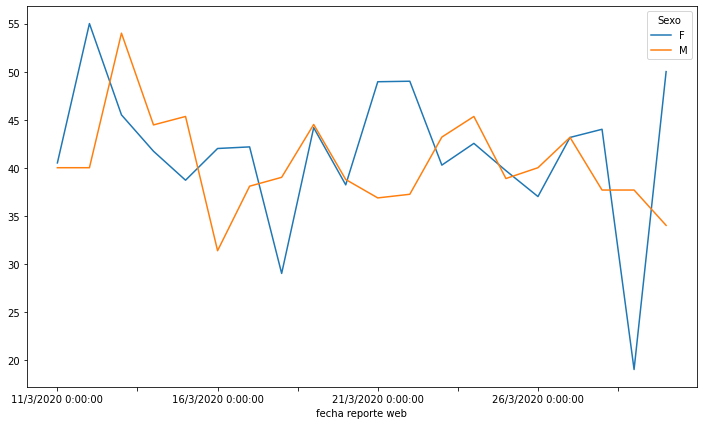

In [230]:
covid600=covid.head(600)
recuperados = covid600[covid.Recuperado == 'Recuperado'];

recuperados.groupby(['fecha reporte web', 'Sexo'])['Edad'].mean().unstack().ffill().plot();


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!